## main

In [1]:
from Registration_2D import *
from Utils import *
# import cv2
import cv2

In [2]:
# %run Registration_2D.py --fixed ./data/OAS1_0002_MR1/brain.nii.gz --moving ./data/OAS1_0001_MR1/brain.nii.gz

In [3]:
parser = argparse.ArgumentParser()
# File path
parser.add_argument("--savepath", type=str,
                    dest="savepath", default='./result_2D',
                    help="path for saving results")
parser.add_argument("--fixed", type=str,
                    dest="fixed", default='./data/OAS1_0001_MR1/brain.nii.gz',
                    help="fixed image data path")
parser.add_argument("--moving", type=str,
                    dest="moving", default='./data/OAS1_0002_MR1/brain.nii.gz',
                    help="moving image data path")
parser.add_argument("--fixed_seg", type=str,
                    dest="fixed_seg", default='./data/OAS1_0001_MR1/brain_aseg.nii.gz',
                    help="fixed image segmentation data path")
parser.add_argument("--moving_seg", type=str,
                    dest="moving_seg", default='./data/OAS1_0002_MR1/brain_aseg.nii.gz',
                    help="moving image segmentation data path")
# Model configuration
parser.add_argument("--ds", type=int,
                    dest="ds", default=2,
                    help="specify output downsample times.")
parser.add_argument("--bs", type=int,
                    dest="bs", default=16,
                    help="bottleneck size.")
kernel = parser.add_argument("--smoothing_kernel", type=str,
                    dest="smoothing_kernel", default='AK',
                    help="AK: Averaging kernel; GK: Gaussian Kernel")
parser.add_argument("--smoothing_win", type=int,
                    dest="smoothing_win", default=13,
                    help="Smoothing Kernel size")
parser.add_argument("--smoothing_pass", type=int,
                    dest="smoothing_pass", default=1,
                    help="Number of Smoothing pass")
# Training configuration
parser.add_argument("--time_steps", type=int,
                    dest="time_steps", default=2,
                    help="number of time steps between the two images, >=2.")
parser.add_argument("--optimizer", type=str,
                    dest="optimizer", default='Euler',
                    help="Euler or RK.")
parser.add_argument("--STEP_SIZE", type=float,
                    dest="STEP_SIZE", default=0.001,
                    help="step size for numerical integration.")
parser.add_argument("--epoches", type=int,
                    dest="epoches", default=200,
                    help="No. of epochs to train.")
parser.add_argument("--NCC_win", type=int,
                    dest="NCC_win", default=21,
                    help="NCC window size")
parser.add_argument("--lr", type=float,
                    dest="lr", default=0.005,
                    help="Learning rate.")
parser.add_argument("--lambda_J", type=int,
                    dest="lambda_J", default=2.5,
                    help="Loss weight for neg J")
parser.add_argument("--lambda_df", type=int,
                    dest="lambda_df", default=0.05,
                    help="Loss weight for dphi/dx")
parser.add_argument("--lambda_v", type=int,
                    dest="lambda_v", default=0.00005,
                    help="Loss weight for neg J")
parser.add_argument("--loss_sim", type=str,
                    dest="loss_sim", default='NCC',
                    help="Similarity measurement")
# Debug
parser.add_argument("--debug", type=bool,
                    dest="debug", default=False,
                    help="debug mode")
# Device
parser.add_argument("--device", type=str,
                    dest="device", default='cuda:0',
                    help="gpu: cuda:0; cpu: cpu")

config = parser.parse_args("")



In [4]:
moving = load_nii('./data\OAS1_0001_MR1/brain.nii.gz')
fixed = load_nii('./data\OAS1_0002_MR1/brain.nii.gz')
moving_img = moving[:,:,50]
fixed_img = fixed[:,:,50]

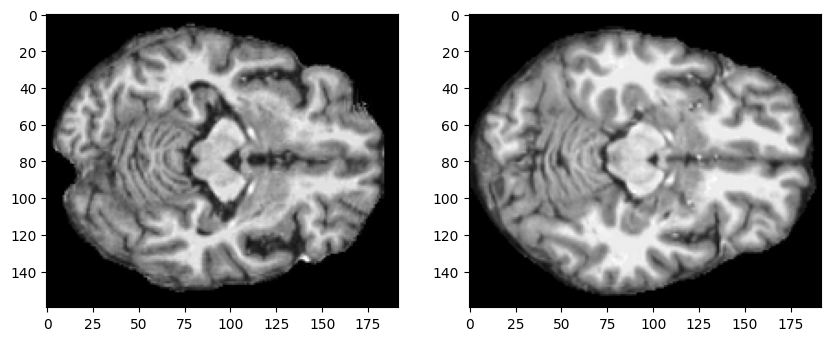

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(moving_img, cmap='gray')
axes[1].imshow(fixed_img, cmap='gray')

In [6]:
device = torch.device(config.device)
best_df, best_df_with_grid, best_warped_moving = registration2d(config, device,moving=moving_img, fixed=fixed_img)

(160, 192)


c:\Users\blacksilver\.conda\envs\paper_reproduce\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
c:\Users\blacksilver\.conda\envs\paper_reproduce\lib\site-packages\torch\nn\functional.py:3734: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


Iteration: 10 Loss_sim: 5.615e-01 loss_J: 0.000e+00
Iteration: 20 Loss_sim: 4.314e-01 loss_J: 6.106e-04
Iteration: 30 Loss_sim: 3.749e-01 loss_J: 1.904e-03
Iteration: 40 Loss_sim: 3.344e-01 loss_J: 8.038e-03
Iteration: 50 Loss_sim: 3.170e-01 loss_J: 7.744e-03
Iteration: 60 Loss_sim: 3.065e-01 loss_J: 6.115e-03
Iteration: 70 Loss_sim: 2.992e-01 loss_J: 5.090e-03
Iteration: 80 Loss_sim: 2.931e-01 loss_J: 5.878e-03
Iteration: 90 Loss_sim: 2.896e-01 loss_J: 4.200e-03
Iteration: 100 Loss_sim: 2.890e-01 loss_J: 3.313e-03
Iteration: 110 Loss_sim: 2.865e-01 loss_J: 3.107e-03
Iteration: 120 Loss_sim: 2.785e-01 loss_J: 4.321e-03
Iteration: 130 Loss_sim: 2.741e-01 loss_J: 6.113e-03
Iteration: 140 Loss_sim: 2.791e-01 loss_J: 2.957e-03
Iteration: 150 Loss_sim: 2.689e-01 loss_J: 7.683e-03
current best epoch:  151
current best epoch:  152
current best epoch:  153
current best epoch:  154
current best epoch:  155
current best epoch:  156
current best epoch:  157
current best epoch:  158
Iteration: 160

In [7]:
# import results
warped = load_nii('./result_2D/warped.nii.gz')

In [19]:
# best_df to numpy
# best_df = best_df.detach().cpu().numpy() # (1, 2, 160, 192)
# best_warped_moving = best_warped_moving.detach().cpu().numpy()
best_df_with_grid_both = best_df_with_grid.detach().cpu().numpy() # (1, 160, 192, 2)


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

def plot_grid(x,y, ax=None, **kwargs):
    ax = ax or plt.gca()
    segs1 = np.stack((x,y), axis=2)
    segs2 = segs1.transpose(1,0,2)
    ax.add_collection(LineCollection(segs1, **kwargs))
    ax.add_collection(LineCollection(segs2, **kwargs))
    ax.autoscale()





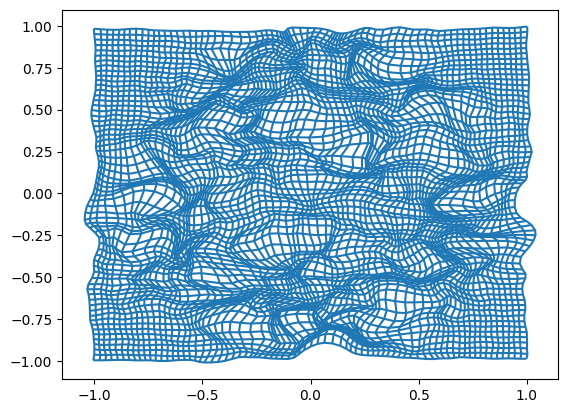

In [21]:
fig, ax = plt.subplots()
# resize the grid
img0 = best_df_with_grid_both[0,:,:,0]
img1 = best_df_with_grid_both[0,:,:,1]
# resize img0 and img1
# resize to a smaller size
resize_factor = 0.4
img0 = cv2.resize(img0, (int(img0.shape[0]*resize_factor), int(img0.shape[1]*resize_factor)), interpolation=cv2.INTER_CUBIC)
img1 = cv2.resize(img1, (int(img1.shape[0]*resize_factor), int(img1.shape[1]*resize_factor)), interpolation=cv2.INTER_CUBIC)
# plot_grid(best_df_with_grid[0,:,:,1], best_df_with_grid[0,:,:,0], ax=ax, color="C0")
plot_grid(img1, img0, ax=ax, color="C0")
plt.show()

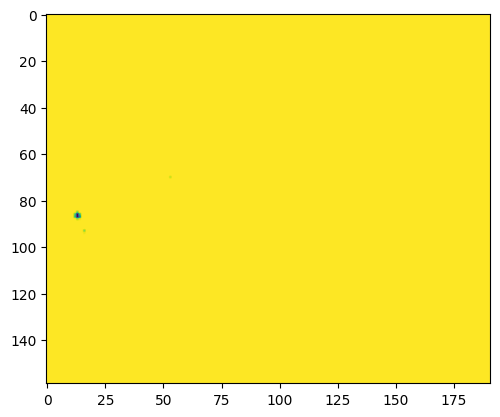

In [22]:
J_det = JacboianDet_2D(best_df_with_grid)
# clip the positive value of J_det to 0
J_neg = torch.clip(J_det, max=0)
# convert to numpy
J_neg = J_neg.detach().cpu().numpy()
plt.imshow(J_neg[0,:,:])

In [23]:
def plot_df(df,is_plot_neg = True, is_plot_grid = True, is_plot_jet = True, resize_factor = 0.4):
    num_plot = is_plot_neg + is_plot_grid + is_plot_jet
    fig, axes = plt.subplots(1, num_plot, figsize=(5*num_plot, 5))
    plot_curr = 0
    if is_plot_grid:
        img0 = best_df_with_grid[0,:,:,0]
        img1 = best_df_with_grid[0,:,:,1]
        # resize img0 and img1
        # resize to a smaller size
        img0 = cv2.resize(img0, (int(img0.shape[0]*resize_factor), int(img0.shape[1]*resize_factor)), interpolation=cv2.INTER_CUBIC)
        img1 = cv2.resize(img1, (int(img1.shape[0]*resize_factor), int(img1.shape[1]*resize_factor)), interpolation=cv2.INTER_CUBIC)
        # plot_grid(best_df_with_grid[0,:,:,1], best_df_with_grid[0,:,:,0], ax=ax, color="C0")
        plot_grid(img1, img0, color="C0", ax = axes[plot_curr])
        plot_curr += 1
    if is_plot_jet:
        J_det = JacboianDet_2D(best_df_with_grid)
        axes[plot_curr].imshow(J_det[0,:,:])
        plot_curr += 1
    if is_plot_neg:
        J_neg = torch.clip(J_det, max=0)
        # convert to numpy
        J_neg = J_neg.detach().cpu().numpy()
        axes[plot_curr].imshow(J_neg[0,:,:])
        plot_curr += 1
    plt.show()

In [25]:
type(best_df_with_grid_both)

numpy.ndarray

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


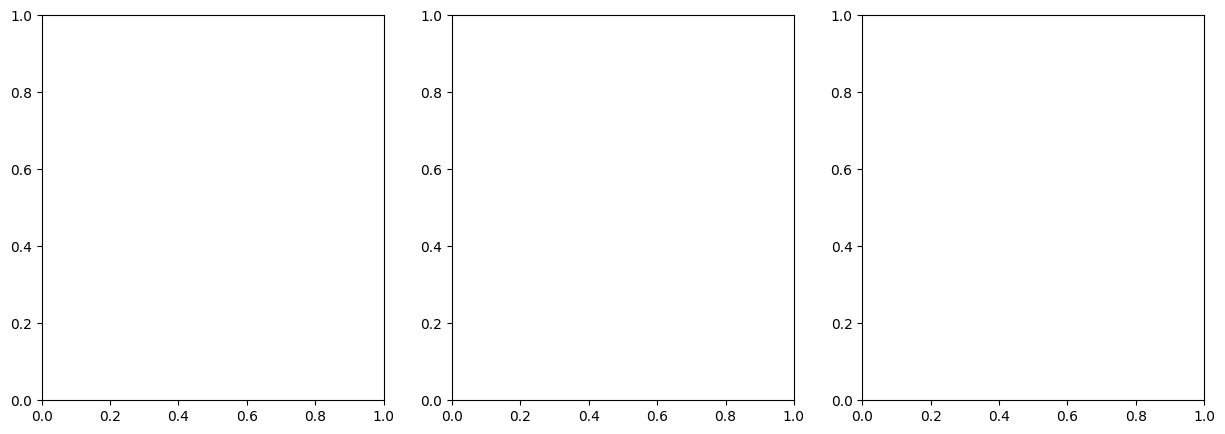

In [26]:
plot_df(best_df_with_grid_both)

In [ ]:
kernel.default = None
config = parser.parse_args("")

best_df, best_df_with_grid, best_warped_moving = registration2d(config, device,moving=moving_img, fixed=fixed_img)

(160, 192)
Iteration: 10 Loss_sim: 6.354e-01 loss_J: 0.000e+00
Iteration: 20 Loss_sim: 6.444e-01 loss_J: 0.000e+00
Iteration: 30 Loss_sim: 6.426e-01 loss_J: 0.000e+00
Iteration: 40 Loss_sim: 5.265e-01 loss_J: 2.717e-02
Iteration: 50 Loss_sim: 4.227e-01 loss_J: 6.606e-03
Iteration: 60 Loss_sim: 3.605e-01 loss_J: 7.978e-03
Iteration: 70 Loss_sim: 3.282e-01 loss_J: 6.878e-03
Iteration: 80 Loss_sim: 3.033e-01 loss_J: 8.127e-03
Iteration: 90 Loss_sim: 2.911e-01 loss_J: 5.969e-03
Iteration: 100 Loss_sim: 2.778e-01 loss_J: 7.511e-03
Iteration: 110 Loss_sim: 2.697e-01 loss_J: 7.026e-03
Iteration: 120 Loss_sim: 2.644e-01 loss_J: 6.214e-03
Iteration: 130 Loss_sim: 2.600e-01 loss_J: 6.244e-03
Iteration: 140 Loss_sim: 2.560e-01 loss_J: 7.086e-03
Iteration: 150 Loss_sim: 2.551e-01 loss_J: 5.903e-03
current best epoch:  151
current best epoch:  152
current best epoch:  153
current best epoch:  154
current best epoch:  155
current best epoch:  156
current best epoch:  157
current best epoch:  158
Ite

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


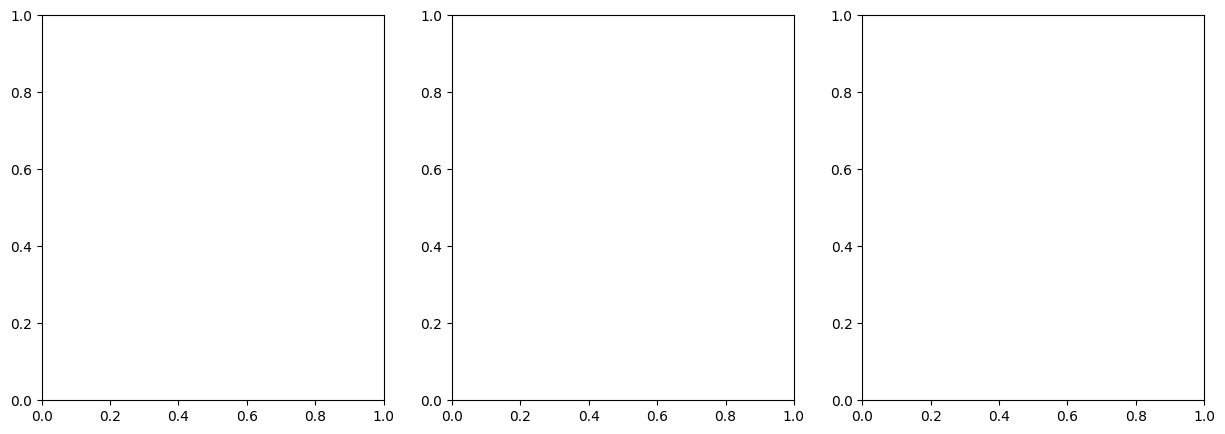

In [ ]:
# to numpy
best_df_with_grid_K = best_df_with_grid.detach().cpu().numpy() # (1, 160, 192, 2)
plot_df(best_df_with_grid_K)